<img src="https://stchristopherolympia.org/wp-content/uploads/2020/03/COVID-19-2.jpeg" width="700" height="240" />

# Covid 19 EDA for all the Countries from 31/12/2019 to 12/06/2020

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)
3. [Data Profiling](#section3)
    - 3.1 [Understanding the Dataset](#section301)<br/>
    - 3.2 [Pre Profiling](#section302)<br/>
    - 3.3 [Preprocessing](#section303)<br/>
    - 3.4 [Post Profiling](#section304)<br/>
4. [Questions](#section4)
    - 4.1 [Of all the Countries, which all are impacted with the most cases and deaths ?](#section401)<br/>
    - 4.2 [Of all the Countries, which all are least impacted with the infection ?](#section402)<br/>
    - 4.3 [In which Countries Covid mortality rate is highest ?](#section403)<br/>
    - 4.4 [In which Countries Covid mortality rate is lowest ?](#section404)<br/>
    - 4.5 [How are the confirmed cases distributed in the World ?](#section405)<br/>
    - 4.6 [What was the weekly trend of infection in US, India, New Zealand and China ?](#section406)<br/>
    - 4.7 [Which all factors are in positive or negative correlation ?](#section407)<br/>
    - 4.8 [Different factors and their relation on different countries](#section408)<br/>
    - 4.9 [What is the latest situation across the World ?](#section409)<br/>
    - 4.10 [How did covid spread across the World from the source ?](#section410)<br/>
5. [Conclusions](#section5)<br/>  

<a id=section1></a>
 ### 1.  Problem Statement
 
 The data set was taken from https://ourworldindata.org/, this data set comprises of information on Covid 19 cases, deaths, and other surveys detail which can be considered as a relative factor for the infection and deaths at country level.

* __Exploratory Data Analysis__ <br/>
In this EDA I will derive the inforamtion on International level and also try to find below questions' answer :
    - Total Cases in the World
    - Total Deaths in the World
    - Countries worst hit due to infection
    - Factors responsible or aiding to the infection
    - Countries least affected due to infection


<a id=section2></a>
 ### 2. Data Loading and Description

The dataset comprises of 23393 observations of 33 columns. Below is a table showing names of all the columns and their description.

| Columns	                       |Description
| -------------                    |:-------------                                 :| 
| iso_code	                       |country code
| continent	                       |country's continent
| location	                       |country name
| date	                           |date of  record
| total_cases	                   |cumulative cases
| new_cases	                       |new cases on that date
| total_deaths	                   |cumulative deaths
| new_deaths	                   |new deaths on that date
| total_cases_per_million	       |cumulative cases per million
| new_cases_per_million	           |new cases per million on that date
| total_deaths_per_million	       |cumulative deaths per million
| new_deaths_per_million	       |new deaths per million on that date
| total_tests	                   |cumulative tests
| new_tests	                       |new test on that date
| total_tests_per_thousand	       |cumulative tests per thousand
| new_tests_per_thousand	       |new tests per thousand on that date
| new_tests_smoothed	           |new tests smoothed on that date
| new_tests_smoothed_per_thousand  |new tests smoothed on that date per thousand
| tests_units	                   |samples tested
| stringency_index	               |strictness index by the govt between 0-100
| population	                   |country's population
| population_density	           |country's population density
| median_age	                   |value with 50% of poupation on either side
| aged_65_older	                   |percentage of population above 65
| aged_70_older	                   |percentage of population above 70
| gdp_per_capita	               |per capita income of the country
| extreme_poverty	               |percentage of people in extreme poverty
| cvd_death_rate	               |total deaths per total cases
| diabetes_prevalence	           |percentage of diabetes cases in country
| female_smokers	               |percentage of female smoking
| male_smokers	                   |percentage of male smoking
| handwashing_facilities	       |percentage of population made the facility available to
| hospital_beds_per_thousand	   |beds per thousand population in a country

#### Importing and Installing Packages

In [1]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
from pandas_profiling import ProfileReport
import plotly.graph_objs as go
import chart_studio.plotly as py
%matplotlib inline
import plotly.offline as offline
from plotly.graph_objs import *
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [2]:
warnings.filterwarnings('ignore')

#### Importing the Dataset

In [3]:
df = pd.read_csv("owid-covid-data.csv")

<a id=section3></a>
 ### 3. Data Profiling
 
 I will use pandas-profiling for my project

In [4]:
#pip install pandas-profiling

In [5]:
#pip install chart-studio

<a id=section301></a>
### 3.1 Understanding the Dataset

In [6]:
df.shape

(23393, 33)

In [7]:
df.head(5)

iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2019-12-31            0          0   
1      AFG      Asia  Afghanistan  2020-01-01            0          0   
2      AFG      Asia  Afghanistan  2020-01-02            0          0   
3      AFG      Asia  Afghanistan  2020-01-03            0          0   
4      AFG      Asia  Afghanistan  2020-01-04            0          0   

   total_deaths  new_deaths  total_cases_per_million  new_cases_per_million  \
0             0           0                      0.0                    0.0   
1             0           0                      0.0                    0.0   
2             0           0                      0.0                    0.0   
3             0           0                      0.0                    0.0   
4             0           0                      0.0                    0.0   

   ...  aged_65_older  aged_70_older  gdp_per_capita  extreme_poverty  \
0  ...          2.581          1.337        1803.987              NaN   
1  ...          2.581          1.337        1803.987              NaN   
2  ...          2.581          1.337        1803.987              NaN   
3  ...          2.581          1.337        1803.987              NaN   
4  ...          2.581          1.337        1803.987              NaN   

   cvd_death_rate  diabetes_prevalence  female_smokers  male_smokers  \
0         597.029                 9.59             NaN           NaN   
1         597.029                 9.59             NaN           NaN   
2         597.029                 9.59             NaN           NaN   
3         597.029                 9.59             NaN           NaN   
4         597.029                 9.59             NaN           NaN   

  handwashing_facilities  hospital_beds_per_thousand  
0                 37.746                         0.5  
1                 37.746                         0.5  
2                 37.746                         0.5  
3                 37.746                         0.5  
4                 37.746                         0.5  

[5 rows x 33 columns]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23393 entries, 0 to 23392
Data columns (total 33 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         23329 non-null  object 
 1   continent                        23164 non-null  object 
 2   location                         23393 non-null  object 
 3   date                             23393 non-null  object 
 4   total_cases                      23393 non-null  int64  
 5   new_cases                        23393 non-null  int64  
 6   total_deaths                     23393 non-null  int64  
 7   new_deaths                       23393 non-null  int64  
 8   total_cases_per_million          23111 non-null  float64
 9   new_cases_per_million            23111 non-null  float64
 10  total_deaths_per_million         23111 non-null  float64
 11  new_deaths_per_million           23111 non-null  float64
 12  total_tests       

<a id=section302></a>
### 3.2 Pre Profiling

In [9]:
#report = ProfileReport(df)
#report.to_file(output_file='Before Pre-Processing Pre-Profiling Report on Covid 19.html')

<a id=section303></a>
### 3.3 Preprocessing

- Dealing with missing values<br/>
    - Dropping all the columns having null values more than 20%
    - Replacing missing values of total_cases_per_million,new_cases_per_million,total_deaths_per_million,
      new_deaths_per_million,median_age,aged_65_older,aged_70_older,gdp_per_capita,cvd_death_rate,diabetes_prevalence,
      hospital_beds_per_thousand  with median values.
    - Removing International,World from the location column
    - Replacing stringency_index with mode value.
    - Countires having population_density as null was replaced by actual values since median and mode were very largely 
      differnet

In [10]:
df.drop(['iso_code','continent','total_tests','new_tests','total_tests_per_thousand',
         'new_tests_per_thousand','new_tests_smoothed','new_tests_smoothed_per_thousand',
         'tests_units','extreme_poverty','female_smokers','male_smokers','handwashing_facilities'],axis=1,inplace=True)

In [11]:
df['total_cases_per_million'].fillna(df['total_cases_per_million'].median(),inplace=True)
df['new_cases_per_million'].fillna(df['new_cases_per_million'].median(),inplace=True)
df['total_deaths_per_million'].fillna(df['total_deaths_per_million'].median(),inplace=True)
df['new_deaths_per_million'].fillna(df['new_deaths_per_million'].median(),inplace=True)
df['stringency_index'].fillna(df['stringency_index'].mode()[0],inplace=True)
df['median_age'].fillna(df['median_age'].median(),inplace=True)
df['aged_65_older'].fillna(df['aged_65_older'].median(),inplace=True)
df['aged_70_older'].fillna(df['aged_70_older'].median(),inplace=True)
df['gdp_per_capita'].fillna(df['gdp_per_capita'].median(),inplace=True)
df['cvd_death_rate'].fillna(df['cvd_death_rate'].median(),inplace=True)
df['diabetes_prevalence'].fillna(df['diabetes_prevalence'].median(),inplace=True)
df['hospital_beds_per_thousand'].fillna(df['hospital_beds_per_thousand'].median(),inplace=True)

In [12]:
df.loc[df.location.str.contains('International'),'population'][df.population].unique()

array([nan])

In [13]:
df.drop(df[df.location=='International'].index,inplace=True)
df.drop(df[df.location=='World'].index,inplace=True)

In [14]:
df.loc[df['population'].isnull()]

Empty DataFrame
Columns: [location, date, total_cases, new_cases, total_deaths, new_deaths, total_cases_per_million, new_cases_per_million, total_deaths_per_million, new_deaths_per_million, stringency_index, population, population_density, median_age, aged_65_older, aged_70_older, gdp_per_capita, cvd_death_rate, diabetes_prevalence, hospital_beds_per_thousand]
Index: []

In [15]:
df1=df.loc[df['population_density'].isnull()]
print(df1.location.unique())

['Anguilla' 'Bonaire Sint Eustatius and Saba' 'Falkland Islands'
 'Guernsey' 'Jersey' 'Montserrat' 'South Sudan' 'Syria' 'Taiwan' 'Vatican'
 'Western Sahara']


In [16]:
df.loc[df.location=='Anguilla','population_density']=df.loc[df.location=='Anguilla','population_density'].fillna(167)
df.loc[df.location=='Bonaire Sint Eustatius and Saba','population_density']=df.loc[df.location=='Bonaire Sint Eustatius and Saba','population_density'].fillna(76.24)
df.loc[df.location=='Falkland Islands','population_density']=df.loc[df.location=='Falkland Islands','population_density'].fillna(0.1)
df.loc[df.location=='Guernsey','population_density']=df.loc[df.location=='Guernsey','population_density'].fillna(433.26)
df.loc[df.location=='Jersey','population_density']=df.loc[df.location=='Jersey','population_density'].fillna(898.28)
df.loc[df.location=='Montserrat','population_density']=df.loc[df.location=='Montserrat','population_density'].fillna(50)
df.loc[df.location=='South Sudan','population_density']=df.loc[df.location=='South Sudan','population_density'].fillna(23)
df.loc[df.location=='Syria','population_density']=df.loc[df.location=='Syria','population_density'].fillna(95)
df.loc[df.location=='Taiwan','population_density']=df.loc[df.location=='Taiwan','population_density'].fillna(649)
df.loc[df.location=='Vatican','population_density']=df.loc[df.location=='Vatican','population_density'].fillna(1172)
df.loc[df.location=='Western Sahara','population_density']=df.loc[df.location=='Western Sahara','population_density'].fillna(2)

<a id=section304></a>
## 3.4 Post Pandas Profiling

In [17]:
#report = ProfileReport(df)
#report.to_file(output_file='After Pre-Processing Pre-Profiling Report on Covid 19.html')

You can compare the two reports, i.e __Before Pre-Processing Pre-Profiling Report on Covid 19.html__ and 
__After Pre-Processing Pre-Profiling Report on Covid 19.html__.<br/>
In After Pre-Processing Pre-Profiling Report on Covid 19.html, observations:
- In the Dataset info, Total __Missing(%)__ = __0.0%__ 
- Number of __variables__ = __20__ 

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23164 entries, 0 to 23163
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   location                    23164 non-null  object 
 1   date                        23164 non-null  object 
 2   total_cases                 23164 non-null  int64  
 3   new_cases                   23164 non-null  int64  
 4   total_deaths                23164 non-null  int64  
 5   new_deaths                  23164 non-null  int64  
 6   total_cases_per_million     23164 non-null  float64
 7   new_cases_per_million       23164 non-null  float64
 8   total_deaths_per_million    23164 non-null  float64
 9   new_deaths_per_million      23164 non-null  float64
 10  stringency_index            23164 non-null  float64
 11  population                  23164 non-null  float64
 12  population_density          23164 non-null  float64
 13  median_age                  231

In [19]:
df.head(5)

location        date  total_cases  new_cases  total_deaths  new_deaths  \
0  Afghanistan  2019-12-31            0          0             0           0   
1  Afghanistan  2020-01-01            0          0             0           0   
2  Afghanistan  2020-01-02            0          0             0           0   
3  Afghanistan  2020-01-03            0          0             0           0   
4  Afghanistan  2020-01-04            0          0             0           0   

   total_cases_per_million  new_cases_per_million  total_deaths_per_million  \
0                      0.0                    0.0                       0.0   
1                      0.0                    0.0                       0.0   
2                      0.0                    0.0                       0.0   
3                      0.0                    0.0                       0.0   
4                      0.0                    0.0                       0.0   

   new_deaths_per_million  stringency_index  population  population_density  \
0                     0.0               0.0  38928341.0              54.422   
1                     0.0               0.0  38928341.0              54.422   
2                     0.0               0.0  38928341.0              54.422   
3                     0.0               0.0  38928341.0              54.422   
4                     0.0               0.0  38928341.0              54.422   

   median_age  aged_65_older  aged_70_older  gdp_per_capita  cvd_death_rate  \
0        18.6          2.581          1.337        1803.987         597.029   
1        18.6          2.581          1.337        1803.987         597.029   
2        18.6          2.581          1.337        1803.987         597.029   
3        18.6          2.581          1.337        1803.987         597.029   
4        18.6          2.581          1.337        1803.987         597.029   

   diabetes_prevalence  hospital_beds_per_thousand  
0                 9.59                         0.5  
1                 9.59                         0.5  
2                 9.59                         0.5  
3                 9.59                         0.5  
4                 9.59                         0.5

<a id=section4></a>
### 4. Questions

<a id=section401></a>
### 4.1 Of all the Countries, which all are impacted with the most cases and deaths ?

In [20]:
df1 = df.copy()
df1['date']=pd.to_datetime(df1['date'])
df1=df1.set_index('date')

I will sort the cases on 12th June and use matplotlib to plot the bar chart of top 10 Countries 

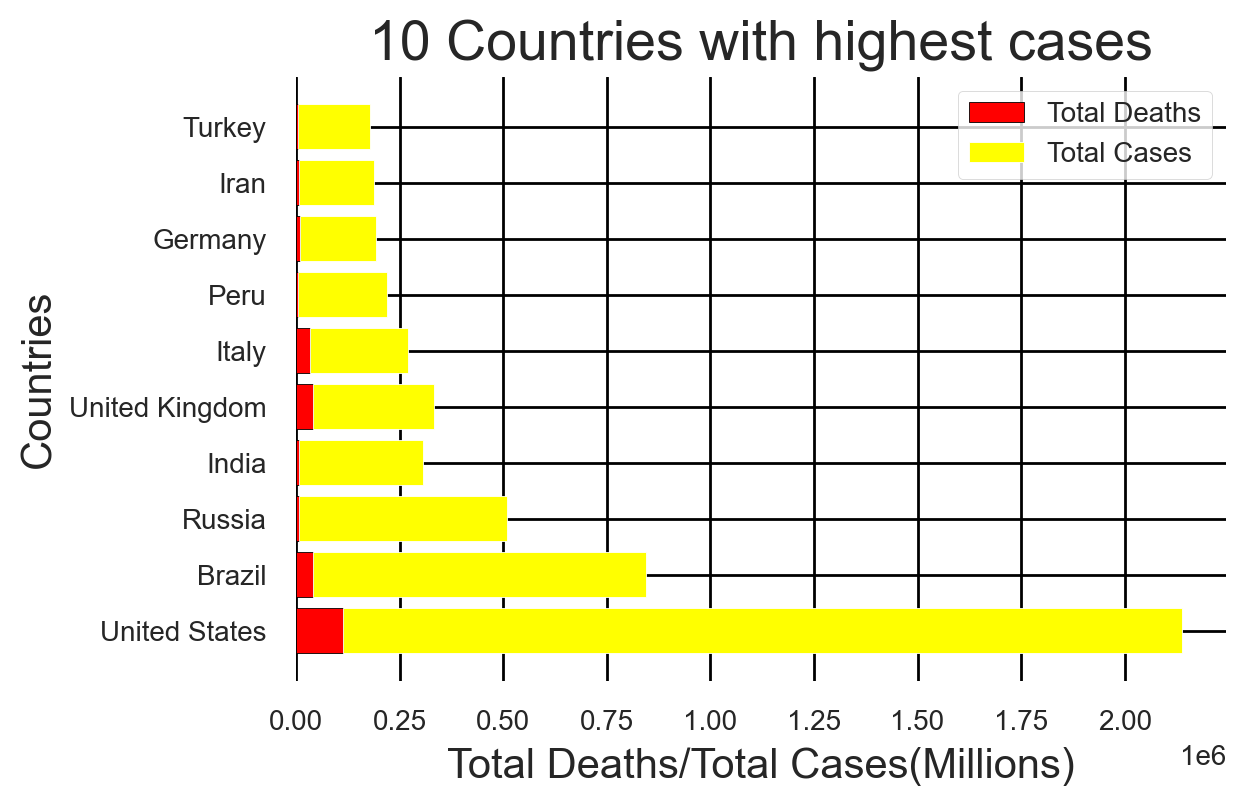

In [21]:
df1=df1.loc['2020-06-12'].sort_values(by='total_cases', ascending=False)[:10]
data=df1[['location','total_cases','total_deaths']]
data.reset_index(inplace=True)
data.drop('date',axis=1,inplace=True)

locations=data.iloc[:,0]
cases=data.iloc[:,1]
deaths=data.iloc[:,2]

plt.figure(dpi=200)
chartdeaths=plt.barh(y=locations,width=deaths,color='#FF0000',edgecolor='black')
chartcases=plt.barh(y=locations,width=cases,left=deaths,color='#FFFF00')
plt.title('10 Countries with highest cases',size=20)
plt.ylabel('Countries',size=15)
plt.xlabel('Total Deaths/Total Cases(Millions)',size=15)
plt.legend(['Total Deaths','Total Cases'],loc=0)
plt.grid(b=True,which='major',axis='both',color='black')
plt.show()

<a id=section402></a>
### 4.2 Of all the Countries, which all are least impacted with the infection ?

I will sort the countries on descending cases and set date as datetime index and used seaborn to plot the horizontal bar plot

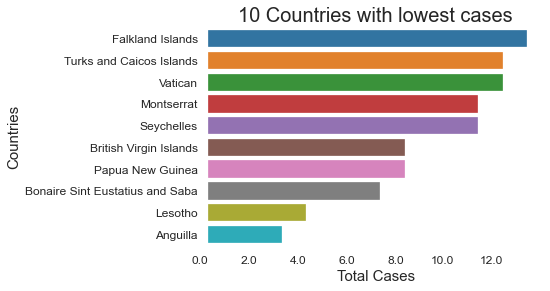

In [22]:
df1 = df.copy()
df1['date']=pd.to_datetime(df1['date'])
df1=df1.set_index('date')
df1=df1.loc['2020-06-12'].sort_values(by='total_cases', ascending=False)
plt.title('10 Countries with lowest cases',size=20)

sns.set_style('white')
chart=sns.barplot(data=df1.tail(10),x='total_cases',y='location')
chart.set_yticklabels(chart.get_yticklabels(),horizontalalignment='right',fontweight='light',fontsize='large')
chart.set_xticklabels(chart.get_xticks(),horizontalalignment='right',fontweight='light',fontsize='large')

plt.xlabel('Total Cases',size=15)
plt.ylabel('Countries',size=15)
plt.show(chart)

<a id=section403></a>
### 4.3 In which Countries Covid mortality rate is highest ?

After setting the index as datetime, I have sorted the cvd_death_rate in descending order for 12th june <br/>
used seaborn plot for plotting the bar graph

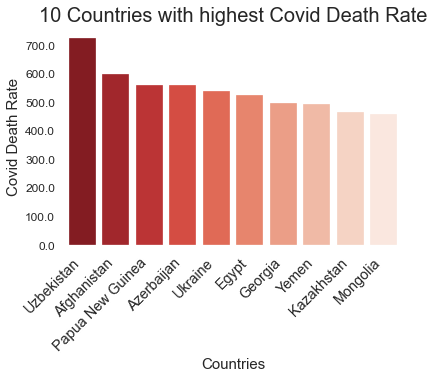

In [23]:
df1 = df.copy()
df1['date']=pd.to_datetime(df1['date'])
df1=df1.set_index('date')
df1=df1.loc['2020-06-12'].sort_values(by='cvd_death_rate', ascending=False)[:10]
chart=sns.barplot(data=df1,y='cvd_death_rate',x='location',palette='Reds_r')

sns.set_style('darkgrid')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right',fontweight='light',fontsize='x-large')
chart.set_yticklabels(chart.get_yticks(), horizontalalignment='right',fontweight='light',fontsize='large')
plt.ylabel('Covid Death Rate',size=15)
plt.xlabel('Countries',size=15)
plt.title('10 Countries with highest Covid Death Rate',size=20)
plt.show(chart)

<a id=section404></a>
### 4.4 In which Countries Covid mortality rate is lowest ?

After setting the index as datetime, I have sorted the cvd_death_rate in ascending order for 12th june <br/>
used seaborn plot for plotting the bar graph

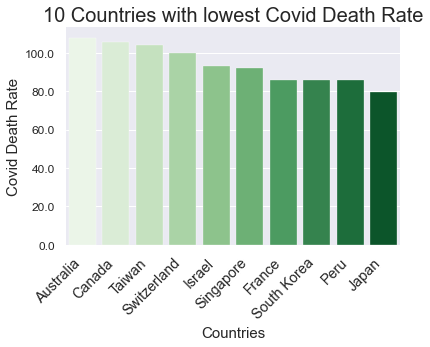

In [24]:
df1 = df.copy()
df1['date']=pd.to_datetime(df1['date'])
df1=df1.set_index('date')
df1=df1.loc['2020-06-12'].sort_values(by='cvd_death_rate', ascending=False)
chart=sns.barplot(data=df1.tail(10),y='cvd_death_rate',x='location',palette='Greens')
sns.set_style('whitegrid')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right',fontweight='light',fontsize='x-large')
chart.set_yticklabels(chart.get_yticks(), horizontalalignment='right',fontweight='light',fontsize='large')
plt.xlabel('Countries',size=15)
plt.ylabel('Covid Death Rate',size=15)
plt.title('10 Countries with lowest Covid Death Rate',size=20)
plt.show(chart)

<a id=section405></a>
### 4.5 How are the confirmed cases distributed in the World ?

I have used matplotlib to plot a donut chart for portraying the percentage of cases wrt countries <br/>
Sorting the total_cases in descending order, I have plotted top 9 countries and then calculated the remaining percentage of cases and countries as 'Others'

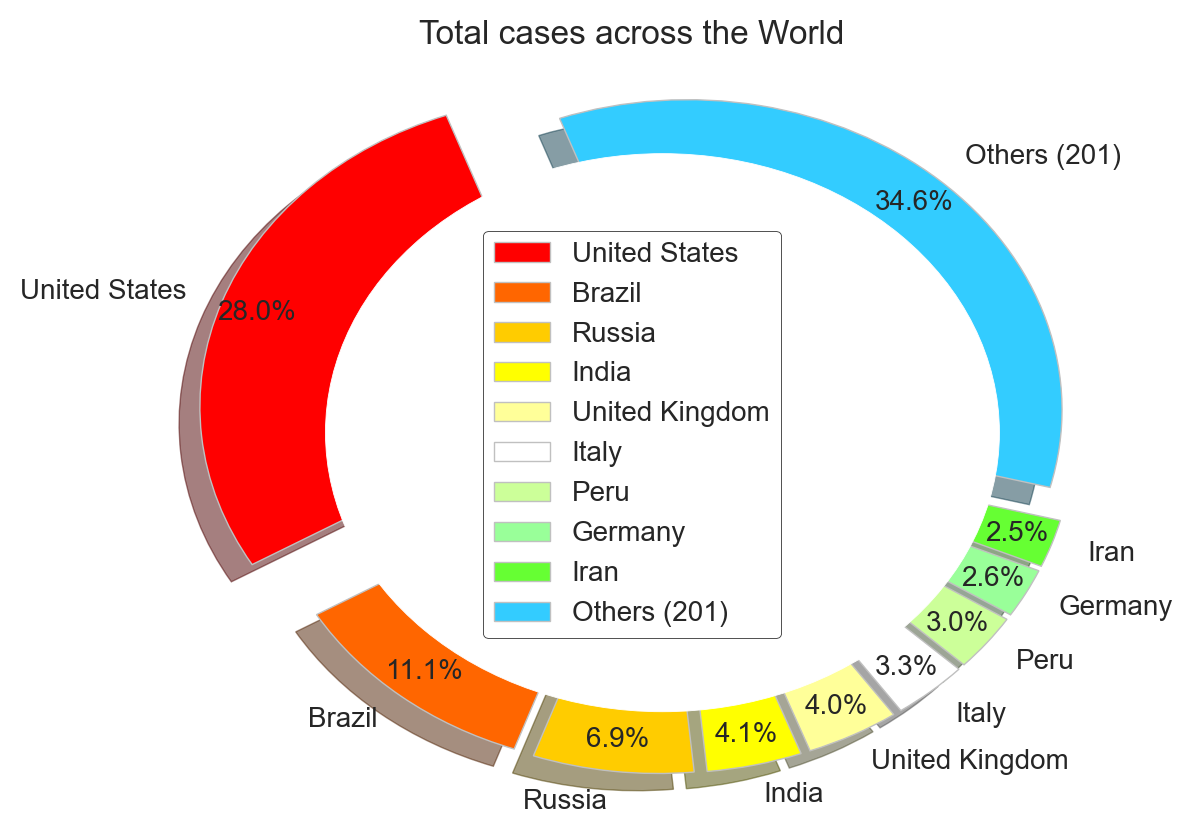

In [25]:
df1 = df.copy()
df1['date']=pd.to_datetime(df1['date'])
df1=df1.set_index('date')
d3=df1.loc['2020-06-12']
total=d3['total_cases'].sum()  # Total sum of cases

d2=df1.loc['2020-06-12'].sort_values(by='total_cases', ascending=False)[:9]
sumT = d2['total_cases'].sum()  # Total sum of top 9 countries cases

labels = d2.location.values.tolist()  #top 9 countries

labels.append('Others (201)')  # 10th member in donut as 'Others and count of countries'
sizes = d2['total_cases'].values.tolist()  # List of cases numbers
sizes.append(total-sumT)

#explsion
#explode = (0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05)
explode = (0.25,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)

colors= ['#FF0000','#FF6600','#FFCC00','#FFFF00','#FFFF99','#FFFFFF','#CCFF99','#99FF99','#66FF33','#33CCFF']
plt.figure(dpi=200)
plt.pie(sizes, labels=labels, explode=explode,colors=colors, autopct='%1.1f%%',shadow=True, startangle=110,pctdistance=0.9,
       wedgeprops = {'linewidth': 0.5,'edgecolor':'silver'})

#draw circle
centre_circle = plt.Circle((0,0),0.9,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('auto')  
plt.legend(labels,loc=10,edgecolor='black')
plt.tight_layout(pad=0.8,h_pad=1.7)
plt.title('Total cases across the World')
plt.show()

<a id=section406></a>
### 4.6 What was the weekly trend of infection in US, India, New Zealand and China ?

It is imperative to learn the progress of the infections in different countries and India <br/>
Below are the reasons for picking on these countries for this analysis against India: <br/>
    - China was the known source of covid 19 
    - US was most adversely affected 
    - New Zealand was the first country to become Covid free

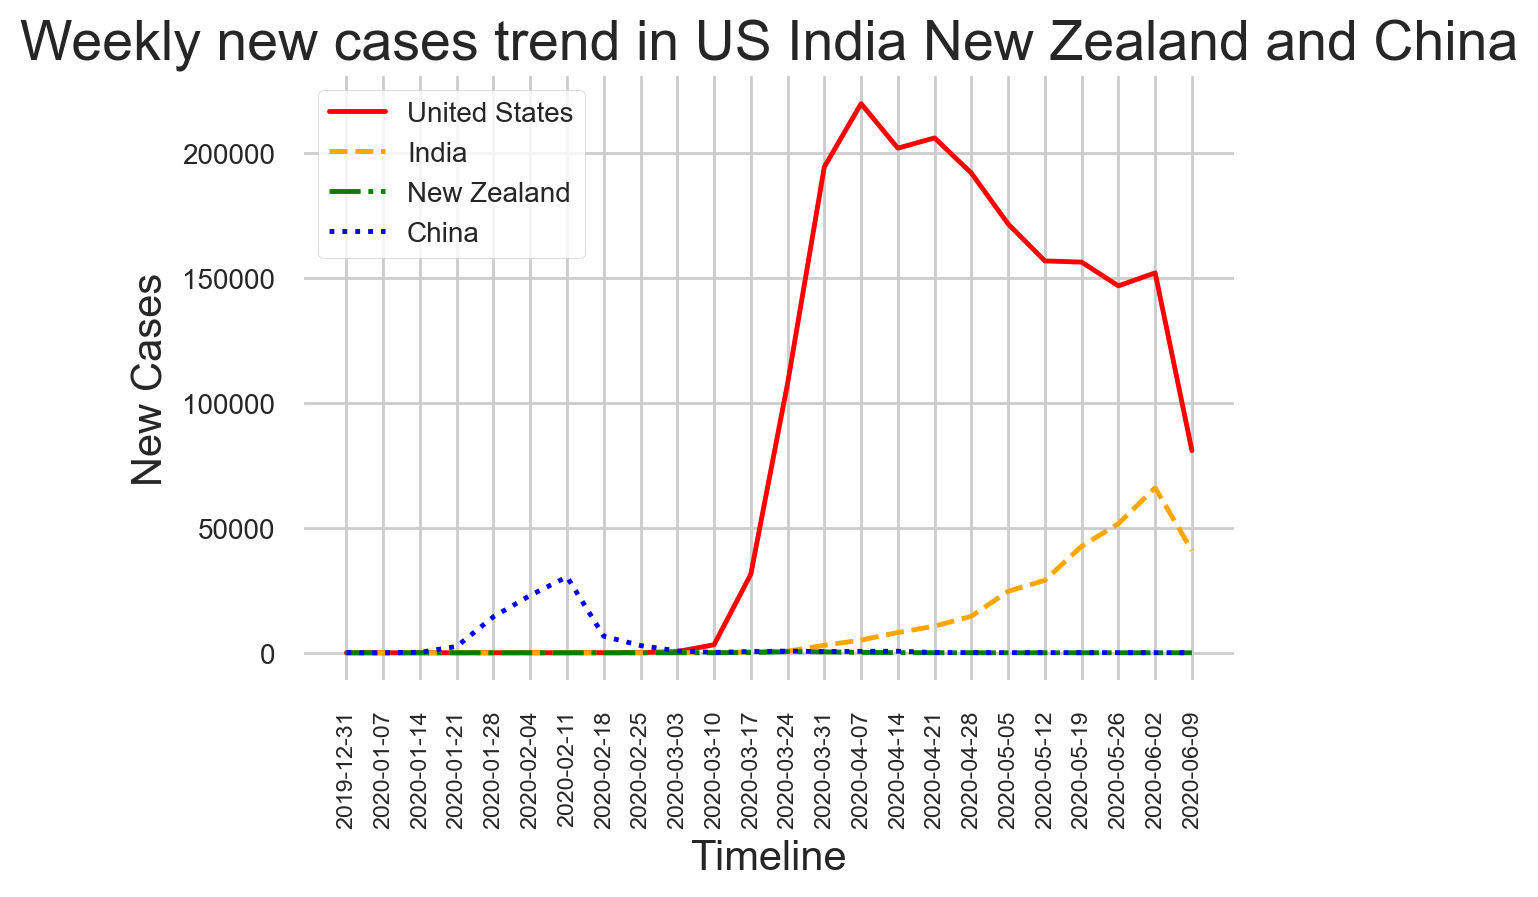

In [26]:
ftest = df.copy()

#Prepare and Resample Time Series for US
fus=ftest[['date','location','new_cases']]
fus=fus.loc[fus.location=='United States']
fus.drop('location',axis=1,inplace=True)
fus['date']=pd.to_datetime(fus['date'])
fus=fus.set_index('date')
fus=fus['new_cases'].resample('7D').sum()

#Prepare and Resample Time Series for India
fin=ftest[['date','location','new_cases']]
fin=fin.loc[fin.location=='India']
fin.drop('location',axis=1,inplace=True)
fin['date']=pd.to_datetime(fin['date'])
fin.set_index('date',inplace=True)
fin=fin['new_cases'].resample('7D').sum()

#Prepare and Resample Time Series for New Zealand
fnz=ftest[['date','location','new_cases']]
fnz=fnz.loc[fnz.location=='New Zealand']
fnz.drop('location',axis=1,inplace=True)
fnz['date']=pd.to_datetime(fnz['date'])
fnz.set_index('date',inplace=True)
fnz=fnz['new_cases'].resample('7D').sum()

#Prepare and Resample Time Series for China
fch=ftest[['date','location','new_cases']]
fch=fch.loc[fch.location=='China']
fch.drop('location',axis=1,inplace=True)
fch['date']=pd.to_datetime(fch['date'])
fch.set_index('date',inplace=True)
fch=fch['new_cases'].resample('7D').sum()

TimeLine = fnz.index.tolist()
case_us = fus.tolist()
case_in = fin.tolist()
case_nz = fnz.tolist()
case_ch = fch.tolist()

plt.figure(dpi=200)
plt.plot(TimeLine, case_us, color='red',linestyle='-')
plt.plot(TimeLine, case_in, color='orange',linestyle='--')
plt.plot(TimeLine, case_nz, color='green',linestyle='-.')
plt.plot(TimeLine, case_ch, color='blue',linestyle=':')
plt.xlabel('Timeline',size=15)
plt.ylabel('New Cases',size=15)
plt.xticks(TimeLine,rotation=90, horizontalalignment='center',fontweight='light',fontsize='small')
plt.legend(['United States','India','New Zealand','China'],loc=0)
plt.grid(b=True)
plt.title('Weekly new cases trend in US India New Zealand and China',size=20)
plt.show()

It was also necessary to know how these countries reacted to this pandemic <br/>
Below plot will show the corresponsing stringency index imposed by the Govt on a weekly trend

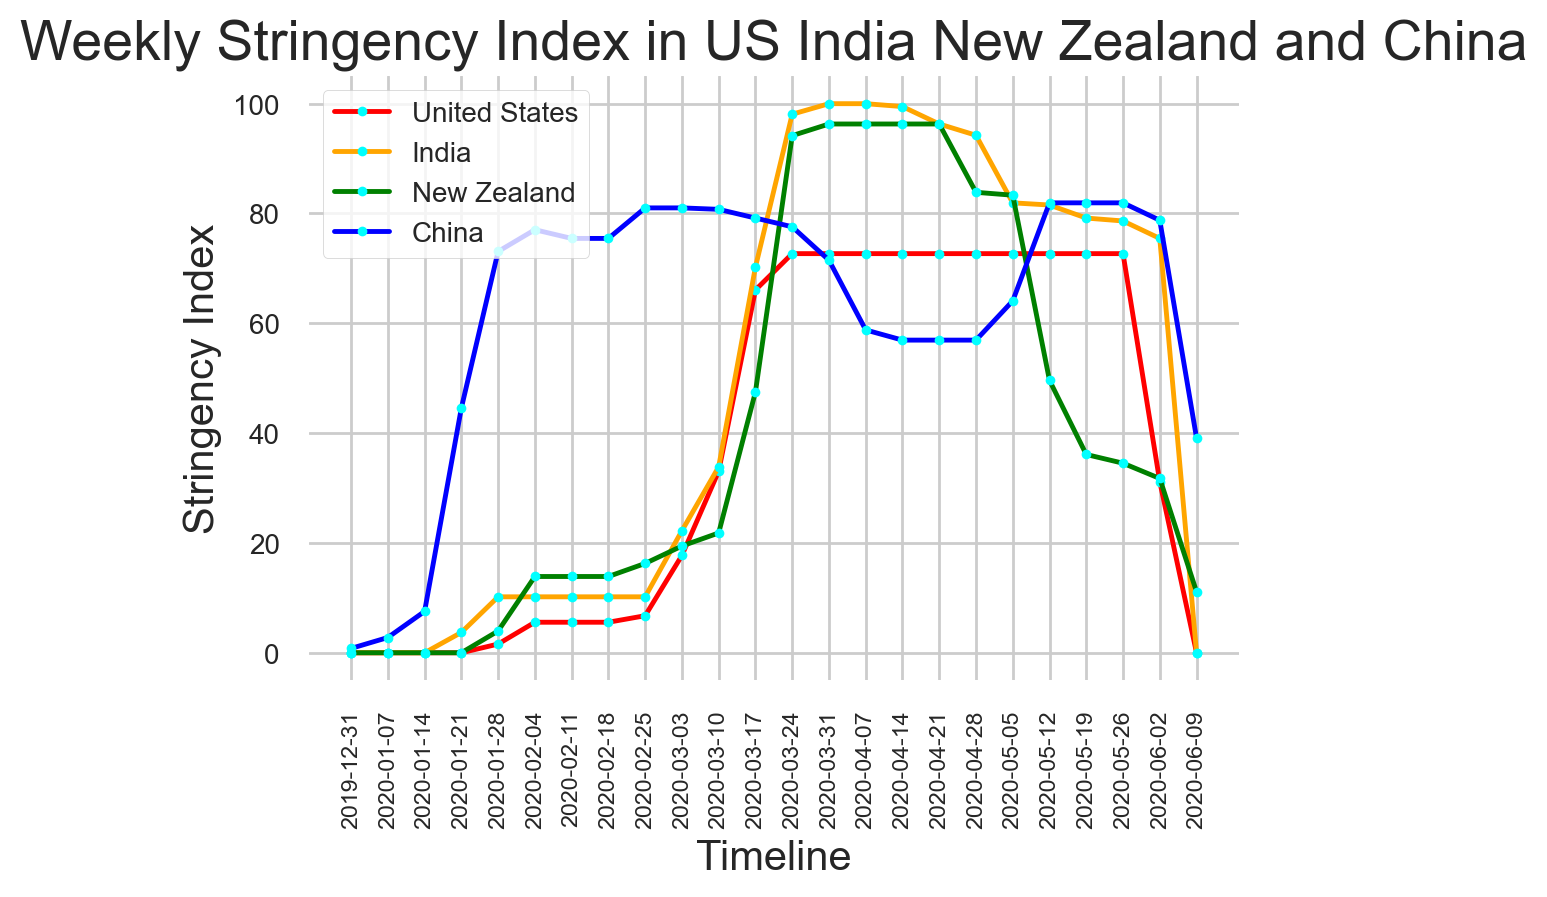

In [27]:
ftest = df.copy()

#Prepare and Resample Time Series for US
fus=ftest[['date','location','stringency_index']]
fus=fus.loc[fus.location=='United States']
fus.drop('location',axis=1,inplace=True)
fus['date']=pd.to_datetime(fus['date'])
fus=fus.set_index('date')
fus=fus['stringency_index'].resample('7D').mean()

#Prepare and Resample Time Series for India
fin=ftest[['date','location','stringency_index']]
fin=fin.loc[fin.location=='India']
fin.drop('location',axis=1,inplace=True)
fin['date']=pd.to_datetime(fin['date'])
fin.set_index('date',inplace=True)
fin=fin['stringency_index'].resample('7D').mean()

#Prepare and Resample Time Series for New Zealand
fnz=ftest[['date','location','stringency_index']]
fnz=fnz.loc[fnz.location=='New Zealand']
fnz.drop('location',axis=1,inplace=True)
fnz['date']=pd.to_datetime(fnz['date'])
fnz.set_index('date',inplace=True)
fnz=fnz['stringency_index'].resample('7D').mean()

#Prepare and Resample Time Series for China
fch=ftest[['date','location','stringency_index']]
fch=fch.loc[fch.location=='China']
fch.drop('location',axis=1,inplace=True)
fch['date']=pd.to_datetime(fch['date'])
fch.set_index('date',inplace=True)
fch=fch['stringency_index'].resample('7D').mean()

TimeLine = fnz.index.tolist()
si_us = fus.tolist()
si_in = fin.tolist()
si_nz = fnz.tolist()
si_ch = fch.tolist()

plt.figure(dpi=200)
plt.plot(TimeLine, si_us, color='red',marker='.', markerfacecolor='cyan')
plt.plot(TimeLine, si_in, color='orange',marker='.', markevery=1, markerfacecolor='cyan')
plt.plot(TimeLine, si_nz, color='green',marker='.', markevery=1, markerfacecolor='cyan')
plt.plot(TimeLine, si_ch, color='blue',marker='.', markevery=1, markerfacecolor='cyan')
plt.xlabel('Timeline',size=15)
plt.ylabel('Stringency Index',size=15)
plt.xticks(TimeLine,rotation=90, horizontalalignment='center',fontweight='light',fontsize='small')
plt.legend(['United States','India','New Zealand','China'],loc=2)
plt.grid(b=True)
plt.title('Weekly Stringency Index in US India New Zealand and China',size=20)
plt.show()

From the above two plots it is seen: <br/>
    - China was quick to respond to this pandemic and was able to flatten the new cases curve faster 
    - US was a bit late to react to the situtaion and caused a spike in new cases 
    - India had the most strict index at the start but there was exponential increase in cases as the index went down 
    - New Zealand did not have a comparative cases in compared to others but the index was identical to that of India 

<a id=section407></a>
### 4.7 Which all factors are in positive or negative correlation ?

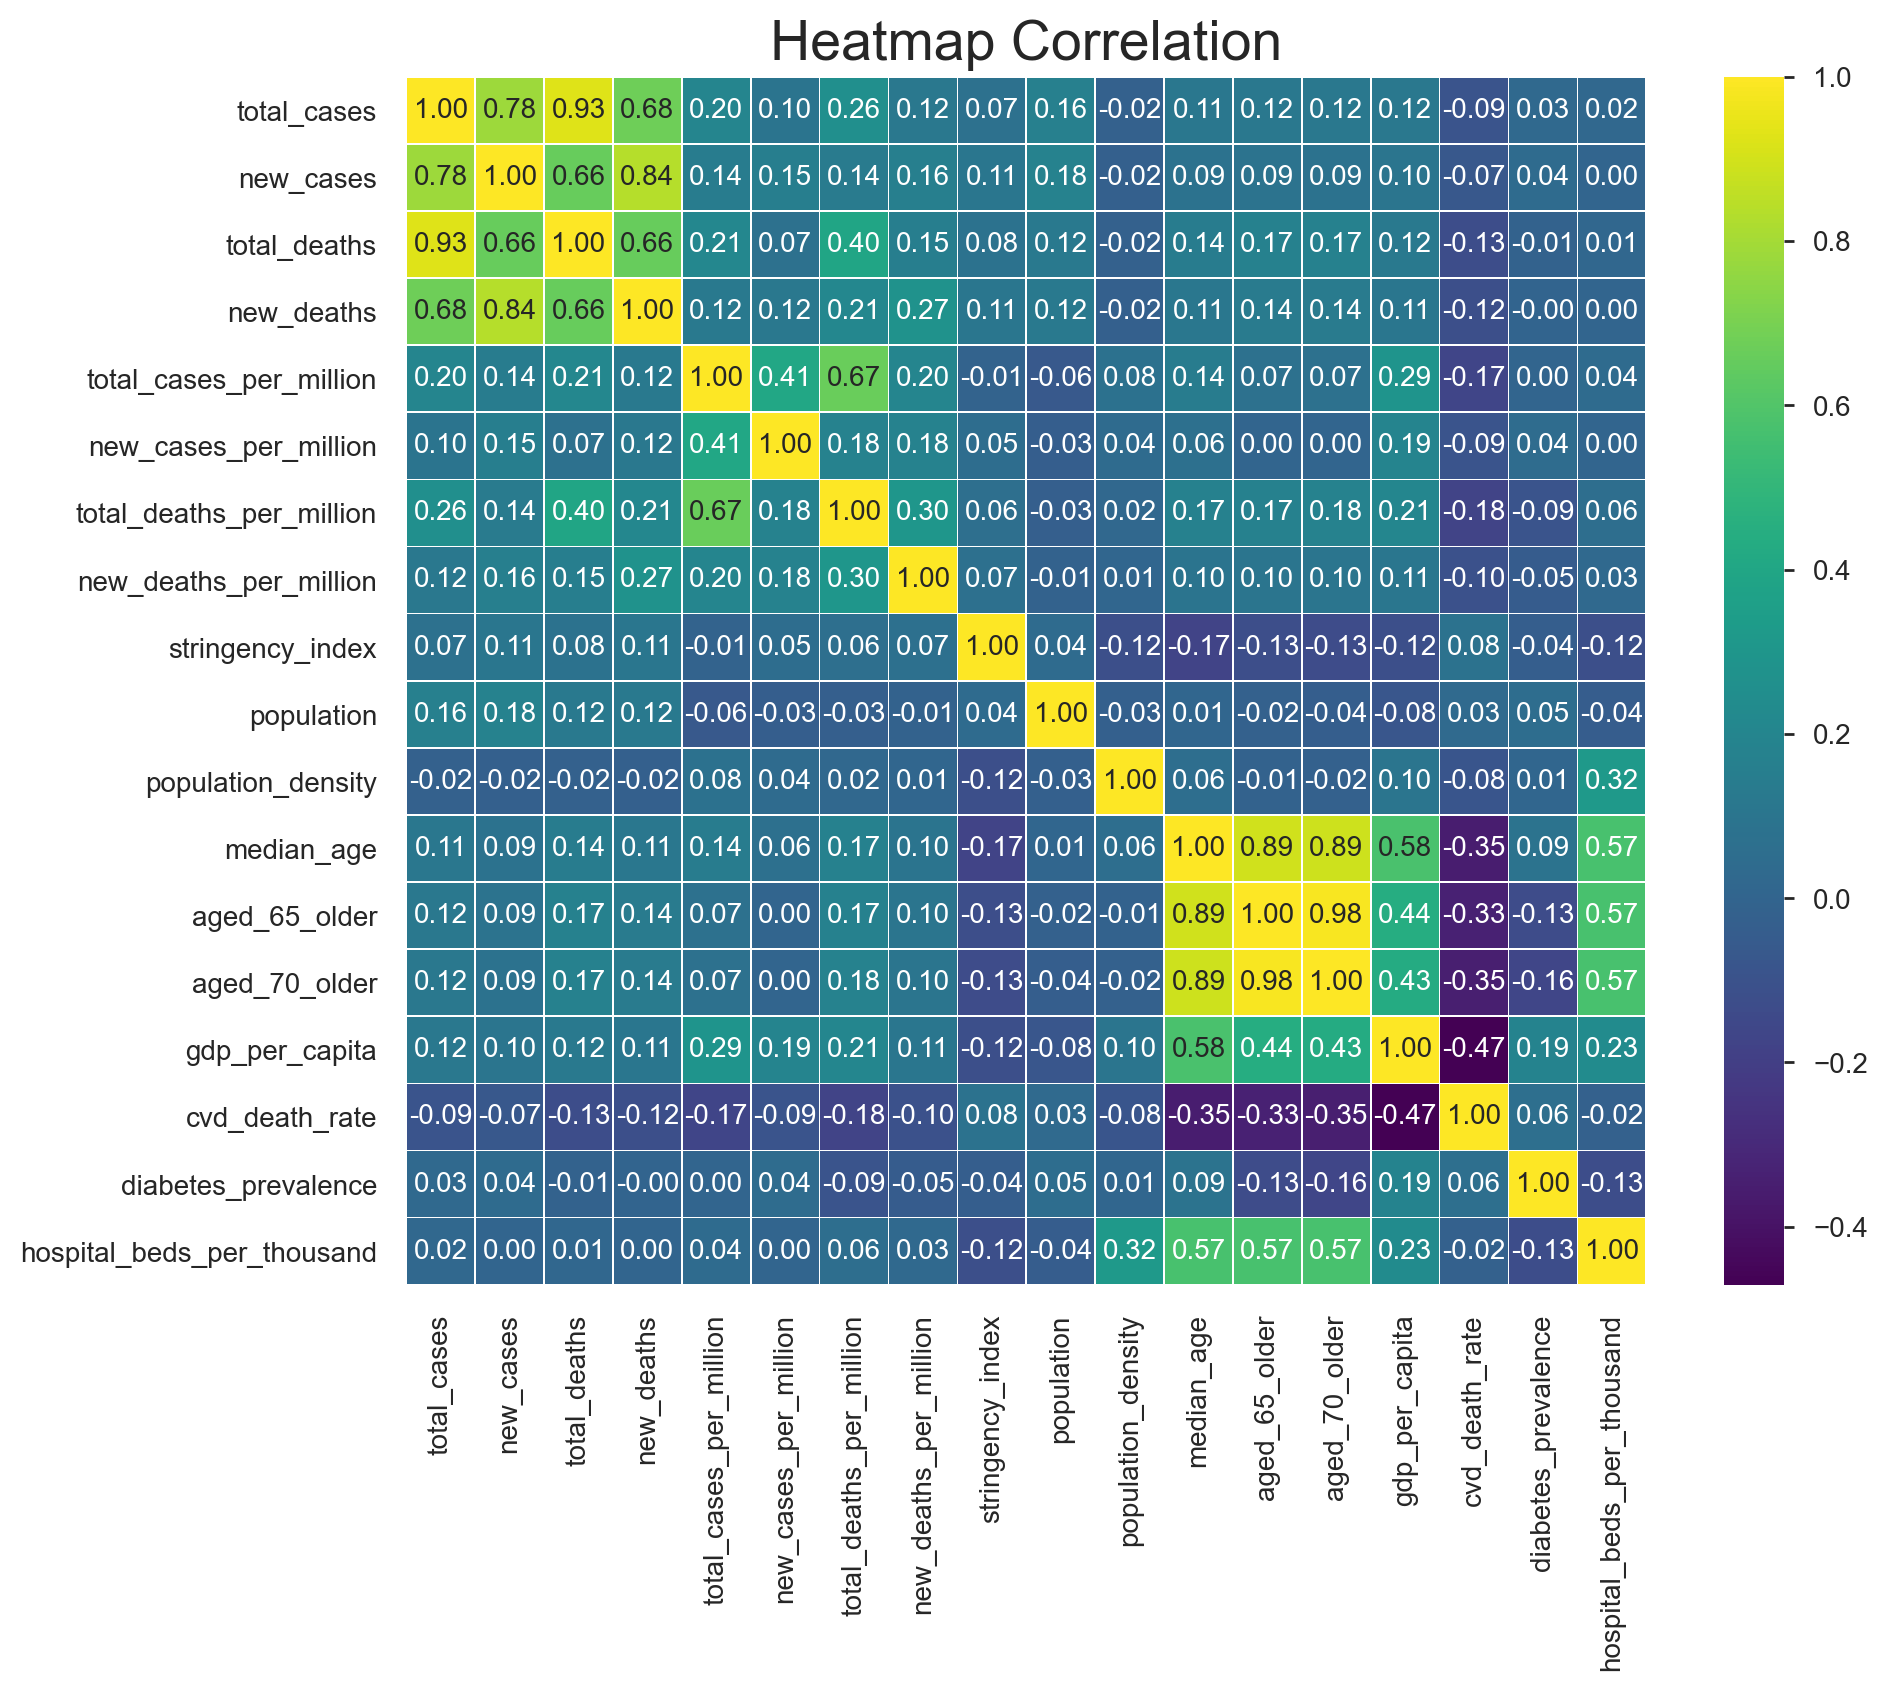

In [28]:
df_corr = df.copy()

#df_corr = df_corr.loc[((df_corr['date']=='2020-06-12'))]
df_corr.drop(['date','location'],axis=1,inplace=True)
corr_mat = df_corr.corr()
plt.figure(figsize=(10,8),dpi=200)
plt.title('Heatmap Correlation',size=20)
sns.heatmap(corr_mat, annot=True,fmt=".2f", linewidths=.25,cmap='viridis')
plt.show()

From the above figure we can learn following observations: <br/>
    - cases and deaths have positive correlation 
    - cvd_death_rate and gdp_per_capita has a weak negative correlation, this might not be true in all countries 
    - total_deaths have a slightly strong relation with aged_70 and aged_65_older than the median_age with mean 32 yrs 
    - Suprisingly cvd_death_rate do not have any positive correlation with the age groups 
    - population_density also do not give any significant relation to cases or deaths

<a id=section408></a>
### 4.8 Different factors and their relation on different countries

In order to learn about how some factors have been impacting the pandemic on different countries <br/>
I will plot a parallel coordinate with factors like deaths_per million, population_density, cvd_death_rate, age factors, diabetes, hospital_beds_per_thousand <br/>
I have plotted it against the worst and the best performer countries wrt to cases and deaths from the above various plots <br/>
In order to plot everything in a uniform scale I will use MinMaxScaler from sklearn

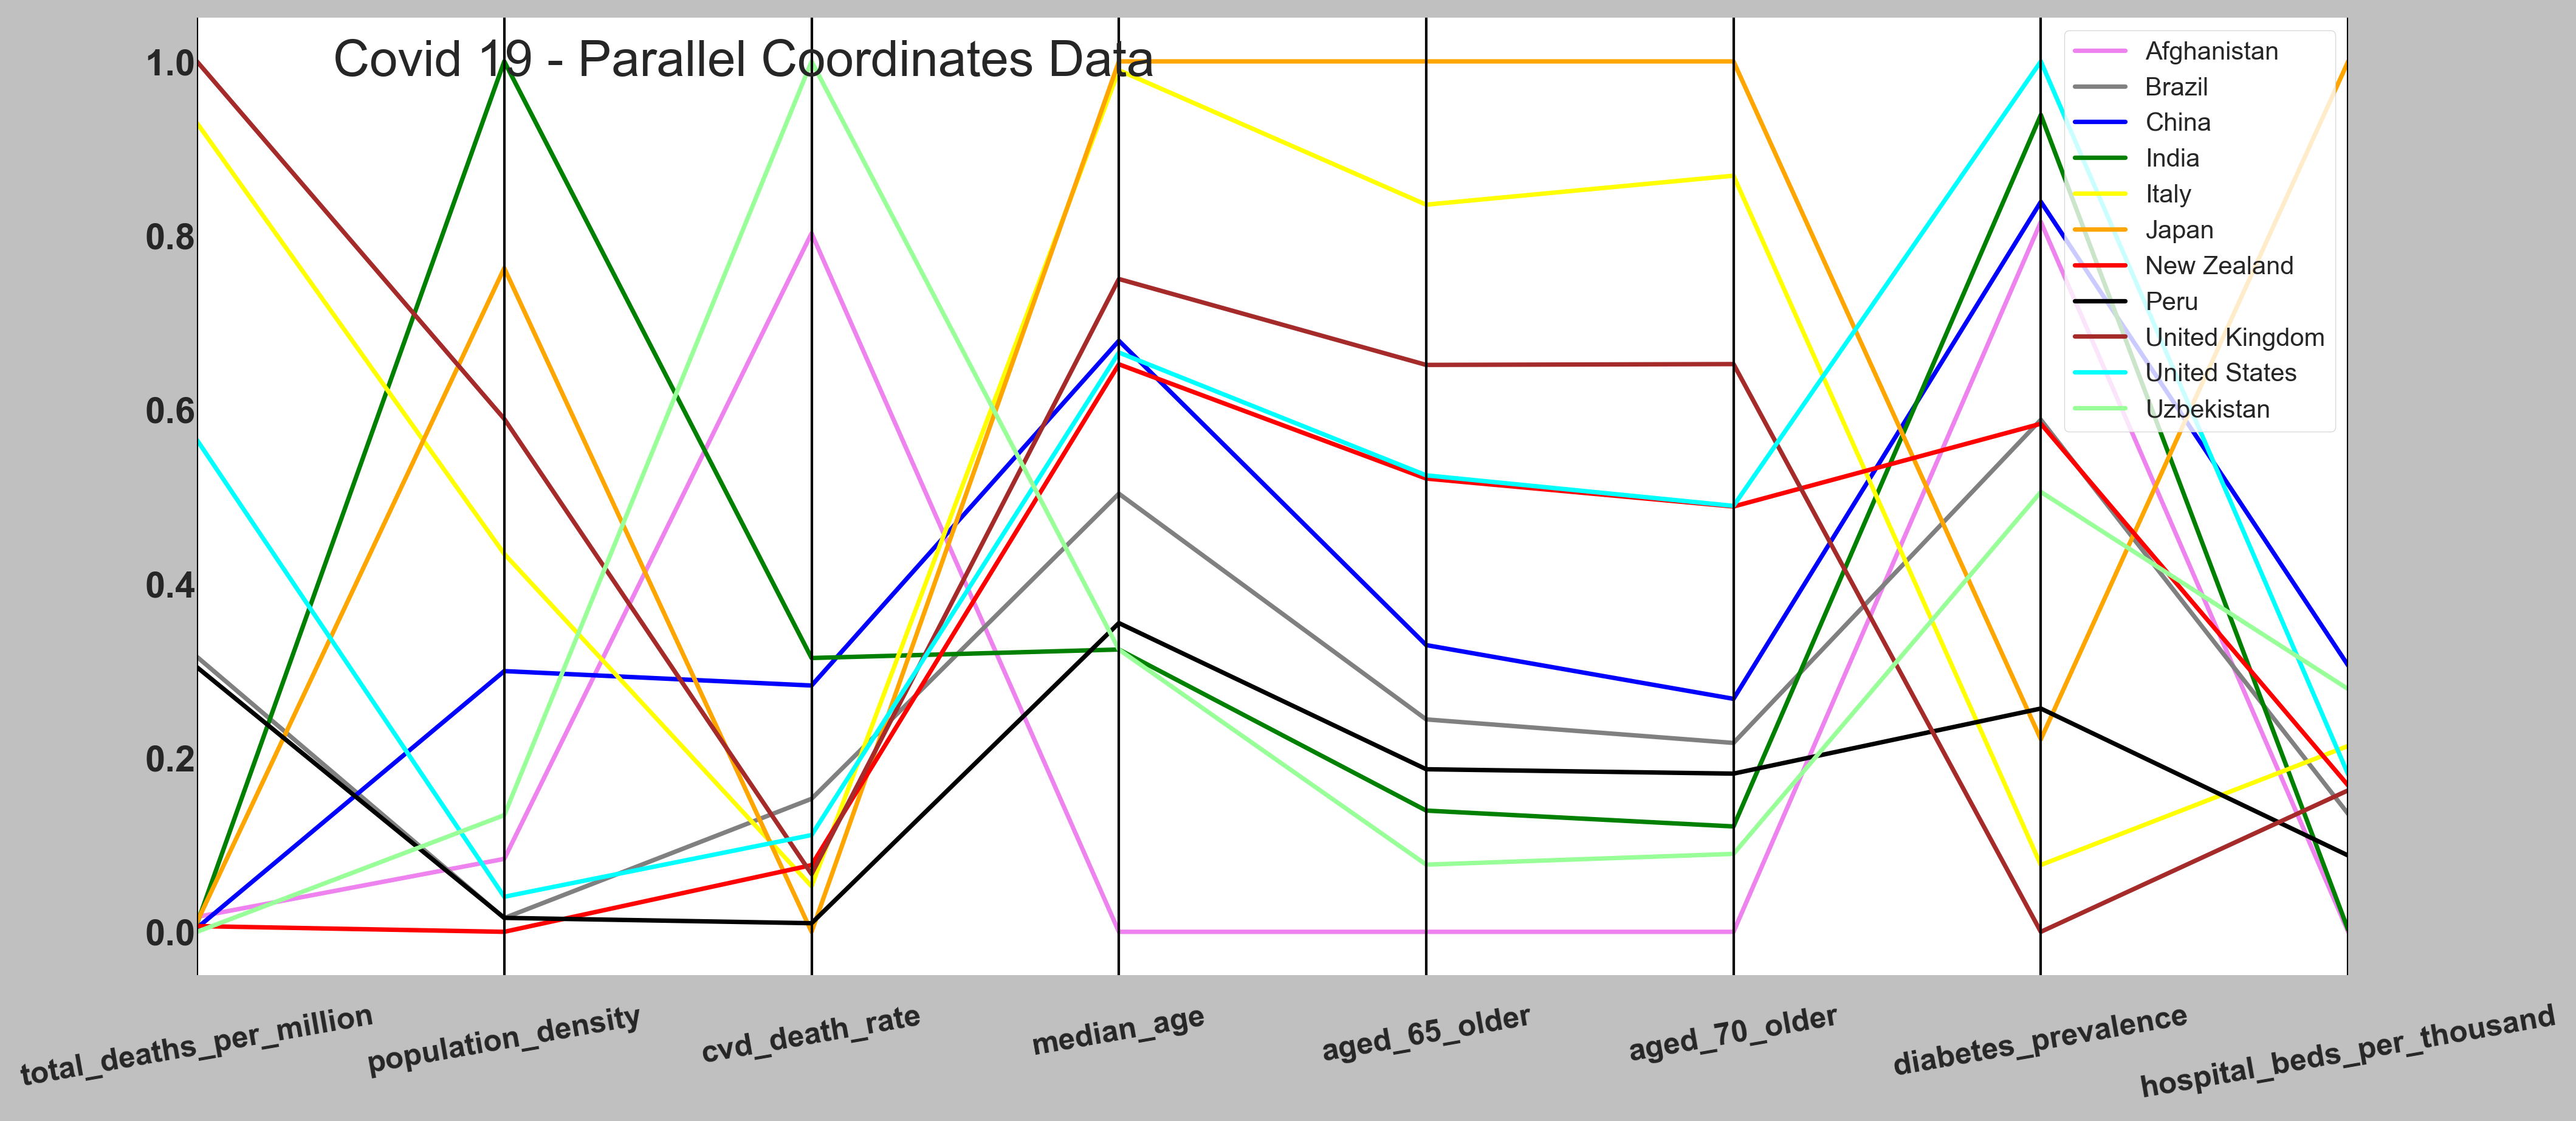

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
pcorf = df.copy()
country=['Afghanistan','Brazil','India','Italy','Japan','New Zealand','Peru','United Kingdom','United States','Uzbekistan','China']
pcorf = pcorf.loc[((pcorf['date']=='2020-06-12'))&(pcorf.location.isin(country))]
pcorf.reset_index(inplace=True)

allcols = ['location','total_deaths_per_million','population_density', 'cvd_death_rate','median_age','aged_65_older', 
        'aged_70_older','diabetes_prevalence','hospital_beds_per_thousand']
cols=['total_deaths_per_million','population_density', 'cvd_death_rate','median_age','aged_65_older', 
        'aged_70_older','diabetes_prevalence','hospital_beds_per_thousand']

subset_df = pcorf[allcols]
subset_df_g=subset_df.drop('location',axis=1)

#ss = StandardScaler()
ss = MinMaxScaler()
scaled_df = ss.fit_transform(subset_df_g)
scaled_df = pd.DataFrame(scaled_df, columns=cols)
final_df = pd.concat([scaled_df, subset_df['location']], axis=1)

fig = plt.figure(figsize=(8,6),facecolor='silver',edgecolor='black',dpi=300)
plt.xticks(rotation=10,horizontalalignment='center',fontweight='bold',fontsize='large')
plt.yticks(horizontalalignment='center',fontweight='bold',fontsize='x-large')
plt.legend(country,loc=0,fontsize='large',edgecolor='black')
title = fig.suptitle("Covid 19 - Parallel Coordinates Data", fontsize=20)
plt.grid(b=True,which='major',axis='both',color='black')
fig.subplots_adjust(top=1,right=1.6, wspace=0.5,hspace=0.5)
pc = parallel_coordinates(final_df,'location',color=('violet','grey','blue','green','yellow','orange','red','black',
                                                      'brown','cyan','#99FF99'))


From the above plot we can draw the following observations: <br/>
    - Afghanistan and Uzbekistan with highest cvd_death_rate also has higher diabetes_prevalence
    - Peru and Japan with lowest cvd_death_rate also has lower diabetes_prevalence
    - cvd_death_rate and age factors show inverse relations which is conflicting the idea of survival in younger patients
    - total deaths per million and population density has an inverse relation with New Zealand an exception

<a id=section409></a>
### 4.9 What is the latest situation across the World ?

I had plot a choropleth with information of total cases and total deaths on latest date

In [30]:
df_chor = df.copy()
df_chor = df_chor.loc[df_chor.date=='2020-06-12']

df_chor['total_deaths'] = df_chor['total_deaths'].astype(str)

df_chor['text'] = 'Deaths: ' + df_chor['total_deaths']
data = [go.Choropleth(colorscale='ylorrd', autocolorscale=False, locations=sorted(df_chor['location'].unique())[1:], 
                      locationmode='country names', z=df_chor['total_cases'][1:],
                      text=df_chor['text'], colorbar=go.choropleth.ColorBar(title="Total Cases and Total Deaths(Millions)"), 
                      marker=go.choropleth.Marker(line=go.choropleth.marker.Line(color='black', width=0.5)))]

layout = go.Layout(geo=go.layout.Geo(dict(scope='world',projection={'type': 'mollweide'})),
                   title=go.layout.Title(text='Covid-19 confirmed cases and deaths as on 12 June,2020'))

fig = go.Figure(data=data, layout=layout)


In [31]:
iplot(fig, filename='d3-cloropleth-map')

<a id=section410></a>
### 4.10 How did covid spread across the World from the source ?

In order to plot the choropleth for all the countrie from start till date <br/>
I had to find the dates whether there are any missing dates, or which all dates are available in all 210 countries

new_df data frame will calculate and display all the dates common in every country

In [32]:
df_chor = df.copy()

In [33]:
#Filter Columns from the data frame
df_chor=df_chor[['date','location','total_cases']]
df_chor['total_cases'] = df_chor['total_cases'].astype(int)

#Store all the country values in list for creating new dataframe
locations = df_chor.location.unique().tolist()

#Find total common dates available for all countries
dups_date = df_chor.pivot_table(index=['date'], aggfunc='size')
dup_df = pd.DataFrame(dups_date,columns=['counts'])
dup_df=dup_df.loc[dup_df.counts==len(locations)]
dates = dup_df.index.tolist()

#Create the new dataframe for common dates for all contries
new_df= pd.DataFrame(index=locations,columns=dates)

#Fill the total cases in the new data frame
for l in locations:
    for d in dates:
        new_df.loc[l,d] = df_chor.loc[(df_chor.location==l)&(df_chor.date==d),'total_cases'].values[0]

new_df

2020-05-31 2020-06-01 2020-06-02 2020-06-03 2020-06-04  \
Afghanistan         14525      15205      15750      16509      17267   
Albania              1122       1137       1143       1164       1184   
Algeria              9267       9394       9513       9626       9626   
Andorra               764        764        765        844        851   
Angola                 84         86         86         86         86   
...                   ...        ...        ...        ...        ...   
Vietnam               327        328        328        328        328   
Western Sahara         23         23         23         23         23   
Yemen                 310        323        354        399        403   
Zambia               1057       1057       1089       1089       1089   
Zimbabwe              174        178        203        206        222   

               2020-06-05 2020-06-06 2020-06-07 2020-06-08 2020-06-09  
Afghanistan         18054      18969      19551      20342      20917  
Albania              1197       1212       1232       1246       1263  
Algeria              9831       9935      10050      10154      10265  
Andorra               852        852        852        852        852  
Angola                 86         86         86         91         92  
...                   ...        ...        ...        ...        ...  
Vietnam               328        329        329        331        332  
Western Sahara         23         23         23         23         23  
Yemen                 453        469        473        486        496  
Zambia               1111       1111       1154       1154       1200  
Zimbabwe              237        265        279        282        287  

[210 rows x 10 columns]

Just 6 dates are available in all the countries out of 165 <br/>
Next is to create a data frame and fill all the missing dates in the respective countries <br/>
Here I will create two data frames final_df_country and new_df which are identical but with different logics implemented <br/>
Both the data frames will have all the dates and countries from 31/12/2019 to 12/06/2020 and its total_cases

In [34]:
df_chor = df.copy()
locations = df_chor.location.unique().tolist()

df_country_list = []
#Prepare and Resample Time Series for all Countries
for i in range(len(locations)):
    df_resample_i=df_chor[['date','location','total_cases']]
    df_resample_i=df_resample_i.loc[df_resample_i.location==locations[i]]
    df_resample_i.drop('location',axis=1,inplace=True)
    df_resample_i['date']=pd.to_datetime(df_resample_i['date'])
    df_resample_i=df_resample_i.set_index('date')
    df_resample_i=df_resample_i['total_cases'].resample('D').max()
    df_resample = pd.DataFrame(df_resample_i)
    df_resample.rename(columns = {'total_cases':locations[i]}, inplace = True) 
    df_country_list.append(df_resample)
final_df_country = pd.concat(df_country_list,axis=1)
final_df_country.sort_index(axis = 0) 

Afghanistan  Albania  Algeria  Andorra  Angola  Anguilla  \
date                                                                   
2019-12-31          0.0      NaN      0.0      NaN     NaN       NaN   
2020-01-01          0.0      NaN      0.0      NaN     NaN       NaN   
2020-01-02          0.0      NaN      0.0      NaN     NaN       NaN   
2020-01-03          0.0      NaN      0.0      NaN     NaN       NaN   
2020-01-04          0.0      NaN      0.0      NaN     NaN       NaN   
...                 ...      ...      ...      ...     ...       ...   
2020-06-08      20342.0   1246.0  10154.0    852.0    91.0       3.0   
2020-06-09      20917.0   1263.0  10265.0    852.0    92.0       3.0   
2020-06-10      21459.0   1299.0  10382.0    852.0    96.0       3.0   
2020-06-11      22143.0   1341.0  10484.0    852.0   113.0       3.0   
2020-06-12      22890.0   1385.0  10589.0    852.0   118.0       3.0   

            Antigua and Barbuda  Argentina  Armenia  Aruba  ...  \
date                                                        ...   
2019-12-31                  NaN        NaN      0.0    NaN  ...   
2020-01-01                  NaN        NaN      0.0    NaN  ...   
2020-01-02                  NaN        NaN      0.0    NaN  ...   
2020-01-03                  NaN        NaN      0.0    NaN  ...   
2020-01-04                  NaN        NaN      0.0    NaN  ...   
...                         ...        ...      ...    ...  ...   
2020-06-08                 26.0    22781.0  13130.0  101.0  ...   
2020-06-09                 26.0    23607.0  13325.0  101.0  ...   
2020-06-10                 26.0    24748.0  13675.0  101.0  ...   
2020-06-11                 26.0    25987.0  14103.0  101.0  ...   
2020-06-12                 26.0    27360.0  14669.0  101.0  ...   

            United States Virgin Islands  Uruguay  Uzbekistan  Vatican  \
date                                                                     
2019-12-31                           NaN      NaN         NaN      NaN   
2020-01-01                           NaN      NaN         NaN      NaN   
2020-01-02                           NaN      NaN         NaN      NaN   
2020-01-03                           NaN      NaN         NaN      NaN   
2020-01-04                           NaN      NaN         NaN      NaN   
...                                  ...      ...         ...      ...   
2020-06-08                          71.0    845.0      4352.0     12.0   
2020-06-09                          71.0    845.0      4448.0     12.0   
2020-06-10                          71.0    846.0      4547.0     12.0   
2020-06-11                          72.0    847.0      4695.0     12.0   
2020-06-12                          72.0    847.0      4819.0     12.0   

            Venezuela  Vietnam  Western Sahara  Yemen  Zambia  Zimbabwe  
date                                                                     
2019-12-31        NaN        0             NaN    NaN     NaN       NaN  
2020-01-01        NaN        0             NaN    NaN     NaN       NaN  
2020-01-02        NaN        0             NaN    NaN     NaN       NaN  
2020-01-03        NaN        0             NaN    NaN     NaN       NaN  
2020-01-04        NaN        0             NaN    NaN     NaN       NaN  
...               ...      ...             ...    ...     ...       ...  
2020-06-08     2377.0      331            23.0  486.0  1154.0     282.0  
2020-06-09     2473.0      332            23.0  496.0  1200.0     287.0  
2020-06-10     2632.0      332            23.0  524.0  1200.0     314.0  
2020-06-11     2738.0      332            23.0  560.0  1252.0     320.0  
2020-06-12     2814.0      332            23.0  591.0  1252.0     332.0  

[165 rows x 210 columns]

In [35]:
final_df_country.fillna(value=0,inplace=True)
final_df_country

Afghanistan  Albania  Algeria  Andorra  Angola  Anguilla  \
date                                                                   
2019-12-31          0.0      0.0      0.0      0.0     0.0       0.0   
2020-01-01          0.0      0.0      0.0      0.0     0.0       0.0   
2020-01-02          0.0      0.0      0.0      0.0     0.0       0.0   
2020-01-03          0.0      0.0      0.0      0.0     0.0       0.0   
2020-01-04          0.0      0.0      0.0      0.0     0.0       0.0   
...                 ...      ...      ...      ...     ...       ...   
2020-06-08      20342.0   1246.0  10154.0    852.0    91.0       3.0   
2020-06-09      20917.0   1263.0  10265.0    852.0    92.0       3.0   
2020-06-10      21459.0   1299.0  10382.0    852.0    96.0       3.0   
2020-06-11      22143.0   1341.0  10484.0    852.0   113.0       3.0   
2020-06-12      22890.0   1385.0  10589.0    852.0   118.0       3.0   

            Antigua and Barbuda  Argentina  Armenia  Aruba  ...  \
date                                                        ...   
2019-12-31                  0.0        0.0      0.0    0.0  ...   
2020-01-01                  0.0        0.0      0.0    0.0  ...   
2020-01-02                  0.0        0.0      0.0    0.0  ...   
2020-01-03                  0.0        0.0      0.0    0.0  ...   
2020-01-04                  0.0        0.0      0.0    0.0  ...   
...                         ...        ...      ...    ...  ...   
2020-06-08                 26.0    22781.0  13130.0  101.0  ...   
2020-06-09                 26.0    23607.0  13325.0  101.0  ...   
2020-06-10                 26.0    24748.0  13675.0  101.0  ...   
2020-06-11                 26.0    25987.0  14103.0  101.0  ...   
2020-06-12                 26.0    27360.0  14669.0  101.0  ...   

            United States Virgin Islands  Uruguay  Uzbekistan  Vatican  \
date                                                                     
2019-12-31                           0.0      0.0         0.0      0.0   
2020-01-01                           0.0      0.0         0.0      0.0   
2020-01-02                           0.0      0.0         0.0      0.0   
2020-01-03                           0.0      0.0         0.0      0.0   
2020-01-04                           0.0      0.0         0.0      0.0   
...                                  ...      ...         ...      ...   
2020-06-08                          71.0    845.0      4352.0     12.0   
2020-06-09                          71.0    845.0      4448.0     12.0   
2020-06-10                          71.0    846.0      4547.0     12.0   
2020-06-11                          72.0    847.0      4695.0     12.0   
2020-06-12                          72.0    847.0      4819.0     12.0   

            Venezuela  Vietnam  Western Sahara  Yemen  Zambia  Zimbabwe  
date                                                                     
2019-12-31        0.0        0             0.0    0.0     0.0       0.0  
2020-01-01        0.0        0             0.0    0.0     0.0       0.0  
2020-01-02        0.0        0             0.0    0.0     0.0       0.0  
2020-01-03        0.0        0             0.0    0.0     0.0       0.0  
2020-01-04        0.0        0             0.0    0.0     0.0       0.0  
...               ...      ...             ...    ...     ...       ...  
2020-06-08     2377.0      331            23.0  486.0  1154.0     282.0  
2020-06-09     2473.0      332            23.0  496.0  1200.0     287.0  
2020-06-10     2632.0      332            23.0  524.0  1200.0     314.0  
2020-06-11     2738.0      332            23.0  560.0  1252.0     320.0  
2020-06-12     2814.0      332            23.0  591.0  1252.0     332.0  

[165 rows x 210 columns]

In [36]:
d1 = df.copy()

locations = d1.location.unique().tolist()
dates = d1.date.unique().tolist()
dates.sort()
new_df = pd.DataFrame(columns=[locations],index=dates)
new_df.fillna(value=0,inplace=True)
new_df

Afghanistan Albania Algeria Andorra Angola Anguilla  \
2019-12-31           0       0       0       0      0        0   
2020-01-01           0       0       0       0      0        0   
2020-01-02           0       0       0       0      0        0   
2020-01-03           0       0       0       0      0        0   
2020-01-04           0       0       0       0      0        0   
...                ...     ...     ...     ...    ...      ...   
2020-06-08           0       0       0       0      0        0   
2020-06-09           0       0       0       0      0        0   
2020-06-10           0       0       0       0      0        0   
2020-06-11           0       0       0       0      0        0   
2020-06-12           0       0       0       0      0        0   

           Antigua and Barbuda Argentina Armenia Aruba  ...  \
2019-12-31                   0         0       0     0  ...   
2020-01-01                   0         0       0     0  ...   
2020-01-02                   0         0       0     0  ...   
2020-01-03                   0         0       0     0  ...   
2020-01-04                   0         0       0     0  ...   
...                        ...       ...     ...   ...  ...   
2020-06-08                   0         0       0     0  ...   
2020-06-09                   0         0       0     0  ...   
2020-06-10                   0         0       0     0  ...   
2020-06-11                   0         0       0     0  ...   
2020-06-12                   0         0       0     0  ...   

           United States Virgin Islands Uruguay Uzbekistan Vatican Venezuela  \
2019-12-31                            0       0          0       0         0   
2020-01-01                            0       0          0       0         0   
2020-01-02                            0       0          0       0         0   
2020-01-03                            0       0          0       0         0   
2020-01-04                            0       0          0       0         0   
...                                 ...     ...        ...     ...       ...   
2020-06-08                            0       0          0       0         0   
2020-06-09                            0       0          0       0         0   
2020-06-10                            0       0          0       0         0   
2020-06-11                            0       0          0       0         0   
2020-06-12                            0       0          0       0         0   

           Vietnam Western Sahara Yemen Zambia Zimbabwe  
2019-12-31       0              0     0      0        0  
2020-01-01       0              0     0      0        0  
2020-01-02       0              0     0      0        0  
2020-01-03       0              0     0      0        0  
2020-01-04       0              0     0      0        0  
...            ...            ...   ...    ...      ...  
2020-06-08       0              0     0      0        0  
2020-06-09       0              0     0      0        0  
2020-06-10       0              0     0      0        0  
2020-06-11       0              0     0      0        0  
2020-06-12       0              0     0      0        0  

[165 rows x 210 columns]

In [37]:
d1.set_index(['date'],inplace=True)

In [38]:
for l in locations:
    Clist=d1[d1['location']==l].index.tolist()
    for d in Clist:
        new_df.loc[d,l] = d1.loc[(d1.location==l)&(d1.index==d),'total_cases'].values[0]       

In [39]:
new_df.sort_index(axis = 0) 
new_df

Afghanistan Albania Algeria Andorra Angola Anguilla  \
2019-12-31           0       0       0       0      0        0   
2020-01-01           0       0       0       0      0        0   
2020-01-02           0       0       0       0      0        0   
2020-01-03           0       0       0       0      0        0   
2020-01-04           0       0       0       0      0        0   
...                ...     ...     ...     ...    ...      ...   
2020-06-08       20342    1246   10154     852     91        3   
2020-06-09       20917    1263   10265     852     92        3   
2020-06-10       21459    1299   10382     852     96        3   
2020-06-11       22143    1341   10484     852    113        3   
2020-06-12       22890    1385   10589     852    118        3   

           Antigua and Barbuda Argentina Armenia Aruba  ...  \
2019-12-31                   0         0       0     0  ...   
2020-01-01                   0         0       0     0  ...   
2020-01-02                   0         0       0     0  ...   
2020-01-03                   0         0       0     0  ...   
2020-01-04                   0         0       0     0  ...   
...                        ...       ...     ...   ...  ...   
2020-06-08                  26     22781   13130   101  ...   
2020-06-09                  26     23607   13325   101  ...   
2020-06-10                  26     24748   13675   101  ...   
2020-06-11                  26     25987   14103   101  ...   
2020-06-12                  26     27360   14669   101  ...   

           United States Virgin Islands Uruguay Uzbekistan Vatican Venezuela  \
2019-12-31                            0       0          0       0         0   
2020-01-01                            0       0          0       0         0   
2020-01-02                            0       0          0       0         0   
2020-01-03                            0       0          0       0         0   
2020-01-04                            0       0          0       0         0   
...                                 ...     ...        ...     ...       ...   
2020-06-08                           71     845       4352      12      2377   
2020-06-09                           71     845       4448      12      2473   
2020-06-10                           71     846       4547      12      2632   
2020-06-11                           72     847       4695      12      2738   
2020-06-12                           72     847       4819      12      2814   

           Vietnam Western Sahara Yemen Zambia Zimbabwe  
2019-12-31       0              0     0      0        0  
2020-01-01       0              0     0      0        0  
2020-01-02       0              0     0      0        0  
2020-01-03       0              0     0      0        0  
2020-01-04       0              0     0      0        0  
...            ...            ...   ...    ...      ...  
2020-06-08     331             23   486   1154      282  
2020-06-09     332             23   496   1200      287  
2020-06-10     332             23   524   1200      314  
2020-06-11     332             23   560   1252      320  
2020-06-12     332             23   591   1252      332  

[165 rows x 210 columns]

In both the dataframes final_df_country and new_df for the missing dates total_cases column were filled with 0

Lastly I will plot the data in choropleth with cases from day1 to day165 across the World <br/>
For this I will create a data frame final_df with columns date,location,total_cases

In [40]:
idx = pd.date_range('12-31-2019', '06-12-2020')

sample_df =df.copy()

df_country = []
#Prepare and Resample Time Series for all Countries
for i in range(len(locations)):
    
    df_resample_i=sample_df[['date','location','total_cases']]
    
    df_resample_i=df_resample_i.loc[df_resample_i.location==locations[i]]
    
    df_resample_i.index=pd.DatetimeIndex(df_resample_i['date'])
    
    df_resample_i.drop(['date'],axis=1,inplace=True)
    
    df_resample_i = df_resample_i.reindex(idx)
    
    df_resample = pd.DataFrame(df_resample_i)
    
    df_resample['location'].fillna(value=i,inplace=True)
    
    df_resample['total_cases'].fillna(value=0,inplace=True)
    
    df_resample['date'] = df_resample_i.index
        
    df_country.append(df_resample)
    
    
final_df = pd.concat(df_country,axis=0)

In [41]:
final_df

location  total_cases       date
2019-12-31  Afghanistan          0.0 2019-12-31
2020-01-01  Afghanistan          0.0 2020-01-01
2020-01-02  Afghanistan          0.0 2020-01-02
2020-01-03  Afghanistan          0.0 2020-01-03
2020-01-04  Afghanistan          0.0 2020-01-04
...                 ...          ...        ...
2020-06-08     Zimbabwe        282.0 2020-06-08
2020-06-09     Zimbabwe        287.0 2020-06-09
2020-06-10     Zimbabwe        314.0 2020-06-10
2020-06-11     Zimbabwe        320.0 2020-06-11
2020-06-12     Zimbabwe        332.0 2020-06-12

[34650 rows x 3 columns]

In [42]:
#### input data set:
df_merged = final_df.copy()

### create empty list for data object:    
data_slider = []
for day in df_merged.date.unique():


    df_sected_case = df_merged[(df_merged['date']== day)]

    for col in df_sected_case.columns:  # I transform the columns into string type so I can:
        df_sected_case[col] = df_sected_case[col].astype(str)

    ### I create the text for mouse-hover for each country, for the current day    
    #df_sected_case['text'] = 'Deaths: ' + df_sected_case['total_deaths']

    ### create the dictionary with the data for the current year
    data_one_day = dict(
                        type='choropleth',
                        locations = df_sected_case['location'],
                        z=df_sected_case['total_cases'].astype(float),
                        locationmode='country names',
                        colorscale = 'ylorrd',colorbar=go.choropleth.ColorBar(title="Confirmed Cases"),
                        text = 'Confirmed cases',
                        )

    data_slider.append(data_one_day)  # I add the dictionary to the list of dictionaries for the slider

In [43]:
##  I create the steps for the slider
steps = []

for i in range(len(data_slider)):
    step = dict(method='restyle',
                args=['visible', [False] * len(data_slider)],
                label='Day {}'.format(i)) # label to be displayed for each step (day)
    step['args'][1][i] = True
    steps.append(step)

##  I create the 'sliders' object from the 'steps' 
sliders = [dict(active=1, pad={"t": 1}, steps=steps)]  

In [44]:
# I set up the layout (including slider option)
layout = dict(sliders=sliders,title='Covid-19 spread from 31 Dec,2109 to 12 June,2020')


# I create the figure object:
fig = dict(data=data_slider, layout=layout) 

In [45]:
# to plot in the notebook
offline.iplot(fig)


# to plot in a separete browser window
#offline.plot(fig, auto_open=True, image = 'png', image_filename="map_us_crime_slider" ,image_width=2000, image_height=1000, 
#              filename='C:/Users/Qadir/Pictures/Covid-19 Spread.html', validate=True)

<a id=section5></a>
### 5. Conclusions

- This EDA has given a detailed insight on the infection across the countries in the world
- We got aware that US, Brazil, Russia, India, UK were the most affected countries
- Peru, Japan, New Zealand were amongst the least affected countries
- Cases and Deaths had a positive correlation
- Covid death rate had a negative corelation with the gdp_per_capita
- Diabetes prevelance and covid death rate had positive correlation in some countries
- China which was the source of infection was able to flatten the curve of new cases by March
- Deaths and age factors had an inverse correlation
- India is showing exponential increase in the new cases